# Load Packages

In [1]:
import numpy as np

from estimation.robust_estimator import SampleMean, TruncatedMean, MedianofMean, CatoniMean, WeaklyRobustMean
from estimation.heavy_tail_observations import WeibullNoise, FrechetNoise, ParetoNoise

# Run Experiments

In [13]:
seed = 1
samples = 10000
steps = 100
noise_type = 'frechet'
both_side = True
p = 1.3
scale = 1.0
mean = 1.0

if noise_type == 'weibull':
    weibull_noise = WeibullNoise(alpha=p, scale=scale,p=p, both_side=both_side)
    nu = (weibull_noise.nu_p**(1./p) + np.abs(mean - weibull_noise.mean))**p
    get_observation = lambda : mean + weibull_noise.sample()
elif noise_type == 'frechet':
    frechet_noise = FrechetNoise(alpha=p+0.5, scale=scale, p=p, both_side=both_side)
    nu = (frechet_noise.nu_p**(1./p) + np.abs(mean - frechet_noise.mean))**p
    get_observation = lambda : mean + frechet_noise.sample()
elif noise_type == 'pareto':
    pareto_noise = ParetoNoise(alpha=p+0.5, scale=scale, p=p, both_side=both_side)
    nu = (pareto_noise.nu_p**(1./p) + np.abs(mean - pareto_noise.mean))**p
    get_observation = lambda : mean + pareto_noise.sample()
    
c_list = [1000000., 10000., 100., 1., 0.01, 0.00001]
    
sample_mean = SampleMean(nu, p)
trunc_mean = TruncatedMean(nu, p, delta=1., schedule=True)
median_mean = MedianofMean(nu,p, delta=1., schedule=True)
catoni_mean = CatoniMean(nu,p, delta=1., schedule=True)
weakly_robust_means = [WeaklyRobustMean(nu, p, c=c) for c in c_list]

sample_mean_error_list = []
trunc_mean_error_list = []
median_mean_error_list = []
catoni_mean_error_list = []
weakly_robust_means_error_list = [[] for c in c_list]

np.random.seed(seed)
for i in range(samples):
    y = get_observation()

    sample_mean.update(y)
    trunc_mean.update(y)
    median_mean.update(y)
    catoni_mean.update(y)
    for weakly_robust_mean in weakly_robust_means:
        weakly_robust_mean.update(y)

    if ((i+1)%steps)==0 or i==0:
        y_hat = sample_mean.predict()
        sample_mean_error_list.append(np.abs(mean-y_hat))
        y_hat = trunc_mean.predict()
        trunc_mean_error_list.append(np.abs(mean-y_hat))
        y_hat = median_mean.predict()
        median_mean_error_list.append(np.abs(mean-y_hat))
        y_hat = catoni_mean.predict()
        catoni_mean_error_list.append(np.abs(mean-y_hat))
        for weakly_robust_mean, weakly_robust_mean_error_list in zip(weakly_robust_means,weakly_robust_means_error_list):
            y_hat = weakly_robust_mean.predict()
            weakly_robust_mean_error_list.append(np.abs(mean-y_hat))
        
print("Noise - {}, Moment - {:.2f}, Nu = {:.2f}".format(noise_type, p, nu))
print("Sample Mean Error : {:.3f}".format(sample_mean_error_list[-1]))
print("Truncated Mean Error : {:.3f}".format(trunc_mean_error_list[-1]))
print("Median of Mean Error : {:.3f}".format(median_mean_error_list[-1]))
print("Catoni's Mean Error : {:.3f}".format(catoni_mean_error_list[-1]))
for c, weakly_robust_mean_error_list in zip(c_list,weakly_robust_means_error_list):
    print("Weakly Robust Mean Error ({:.3f}) : {:.3f}".format(c, weakly_robust_mean_error_list[-1]))    

C:\Users\dlxhr\Dropbox\code\minimax_opt_perturb\estimation\robust_estimator.py:144: RuntimeWarning: invalid value encountered in double_scalars
  remainder = lambda x: np.sum(_cal_psi(alpha*(np.array(self._y_list) - x),self._p))/alpha/n


Noise - frechet, Moment - 1.30, Nu = 5.03
Sample Mean Error : 0.270
Truncated Mean Error : 0.188
Median of Mean Error : 0.142
Catoni's Mean Error : 0.047
Weakly Robust Mean Error (1000000.000) : 0.273
Weakly Robust Mean Error (10000.000) : 0.283
Weakly Robust Mean Error (100.000) : 0.313
Weakly Robust Mean Error (1.000) : 0.080
Weakly Robust Mean Error (0.010) : 0.148
Weakly Robust Mean Error (0.000) : 0.971


In [14]:
print("Noise - {}, Moment - {:.2f}, Nu = {:.2f}".format(noise_type, p, nu))
print("Sample Mean Error : {:.3f}".format(sample_mean_error_list[-1]))
print("Truncated Mean Error : {:.3f}".format(trunc_mean_error_list[-1]))
print("Median of Mean Error : {:.3f}".format(median_mean_error_list[-1]))
print("Catoni's Mean Error : {:.3f}".format(catoni_mean_error_list[-1]))
for c, weakly_robust_mean_error_list in zip(c_list,weakly_robust_means_error_list):
    print("Weakly Robust Mean Error ({:.3f}) : {:.3f}".format(c, weakly_robust_mean_error_list[-1]))    

Noise - frechet, Moment - 1.30, Nu = 5.03
Sample Mean Error : 0.270
Truncated Mean Error : 0.188
Median of Mean Error : 0.142
Catoni's Mean Error : 0.047
Weakly Robust Mean Error (1000000.000) : 0.273
Weakly Robust Mean Error (10000.000) : 0.283
Weakly Robust Mean Error (100.000) : 0.313
Weakly Robust Mean Error (1.000) : 0.080
Weakly Robust Mean Error (0.010) : 0.148
Weakly Robust Mean Error (0.000) : 0.971


In [15]:
from matplotlib import pyplot as plt

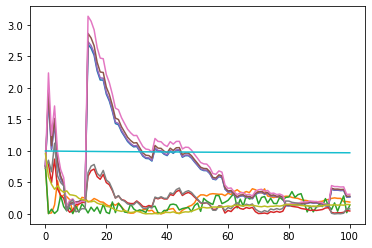

In [20]:
plt.plot(sample_mean_error_list, ms=11, markevery=10)
plt.plot(trunc_mean_error_list, ms=11, markevery=10)
plt.plot(median_mean_error_list, ms=11, markevery=10)
plt.plot(catoni_mean_error_list, ms=11, markevery=10)
for c, weakly_robust_mean_error_list in zip(c_list,weakly_robust_means_error_list):
#     print(weakly_robust_mean_error_list)
    plt.plot(weakly_robust_mean_error_list, ms=11, markevery=10)

In [ ]:
def linearplot_with_confidence(x_list, error_list, label, marker="", color='r'):
    mean_list = np.mean(error_list,axis=0)
    std_list = np.mean(error_list,axis=0)
    a = 0.25
    plt.fill_between(x_list,mean_list-a*std_list,mean_list+a*std_list,alpha=0.13, color=color)
    plt.plot(x_list,mean_list,label=label,marker=marker, ms=11, c=color, markevery=10)

x_list = 1000*np.arange(len(median_mean_error_list[0]))
linearplot_with_confidence(x_list, median_mean_error_list, "Median of Mean",">", "m")
linearplot_with_confidence(x_list, sample_mean_error_list, "Sample Mean", "v", "c")
linearplot_with_confidence(x_list, trunc_mean_error_list, "Truncated Mean", "^", "b")
linearplot_with_confidence(x_list, catoni_mean_error_list, "Catoni's Mean","<", "g")
linearplot_with_confidence(x_list, weakly_robust_mean_error_list, "Weakly Robust Mean","o", "r")

# plt.xscale("log")
plt.xlim([np.min(x_list),np.max(x_list)])
# plt.ylim([0.05,0.25]) # 1.5 1.0
# plt.ylim([0.01,0.05]) # 1.9 1.0
# plt.ylim([0.1,0.7]) # 1.2 0.5
# plt.ylim([0.025,0.16]) #1.2 0.1
# plt.ylim([0.3,1.4]) #1.2 1.0
# plt.ylim([0.1,0.4]) #1.1 0.1
# plt.ylim([0.3,1.4]) #1.1 0.5
# plt.ylim([1.0,4.0]) #1.1 1.0
plt.xlabel("Number of Data",fontsize=25)
plt.ylabel("Error",fontsize=25)

plt.xticks(x_list[::25],x_list[::25],fontsize=18)
plt.yticks(fontsize=18)
# y_ticks,_=plt.yticks()
# plt.yticks(y_ticks[::2], ["{:.2f}".format(tick) for tick in y_ticks[::2]],fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size' : 23})
# print(plt.yticks())
plt.show()